### Clustering

#### K-Means Clustering

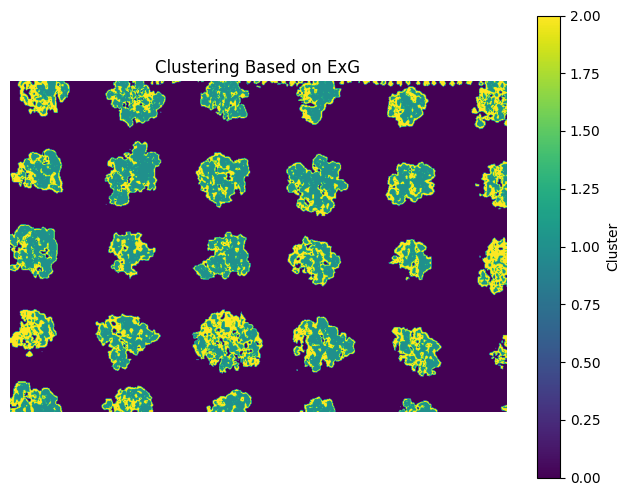

In [ ]:
from sklearn.cluster import KMeans

# Reshape image or vegetation index for clustering
def prepare_data_for_clustering(image, use_index=None):
    """
    Prepare data for clustering.

    Parameters:
    - image: RGB image (H, W, 3).
    - use_index: Vegetation index to use for clustering (e.g., "ExG", "GLI", None for RGB).

    Returns:
    - reshaped_data: Data reshaped to (N, features) for clustering.
    - original_shape: Shape of the original image.
    """
    if use_index is None:
        # Use RGB values for clustering
        reshaped_data = image.reshape(-1, 3)
    else:
        # Use vegetation index
        index_data = indices[use_index]
        reshaped_data = index_data.flatten().reshape(-1, 1)  # Single feature (index)
    return reshaped_data, image.shape[:2]

# Apply k-means clustering
def apply_kmeans_clustering(data, n_clusters=3):
    """
    Apply k-means clustering to the prepared data.

    Parameters:
    - data: Data prepared for clustering (N, features).
    - n_clusters: Number of clusters.

    Returns:
    - Cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

# Visualize clustered image
def visualize_clusters(labels, shape, title="Clustering Result"):
    """
    Visualize clustering result.

    Parameters:
    - labels: Cluster labels for each pixel (flattened).
    - shape: Original image shape for reshaping.
    - title: Title for the plot.
    """
    clustered_image = labels.reshape(shape)
    plt.figure(figsize=(8, 6))
    plt.imshow(clustered_image, cmap='viridis')
    plt.title(title)
    plt.axis("off")
    plt.colorbar(label="Cluster")
    plt.show()

# Example: Use ExG for clustering
data, original_shape = prepare_data_for_clustering(image, use_index="ExG")
cluster_labels = apply_kmeans_clustering(data, n_clusters=3)
visualize_clusters(cluster_labels, original_shape, title="Clustering Based on ExG")


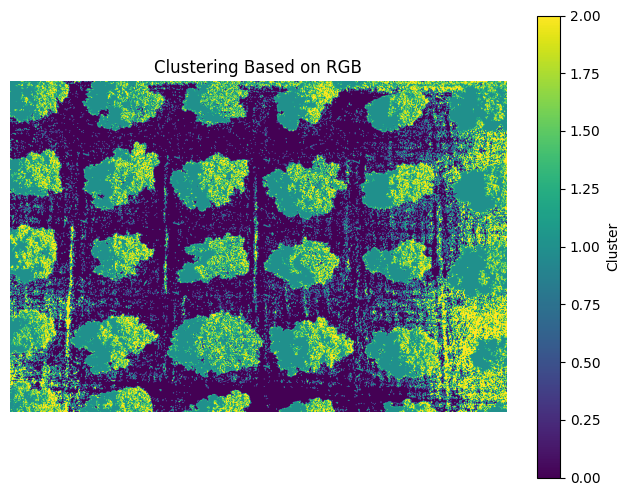

In [ ]:
data, original_shape = prepare_data_for_clustering(image)
cluster_labels = apply_kmeans_clustering(data, n_clusters=3)
visualize_clusters(cluster_labels, original_shape, title="Clustering Based on RGB")


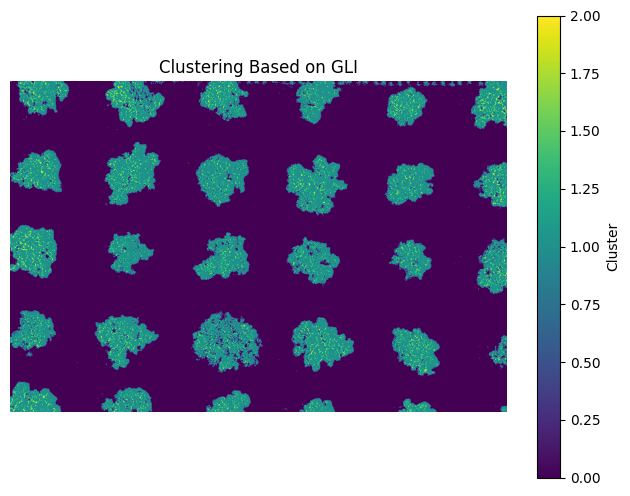

In [ ]:
data, original_shape = prepare_data_for_clustering(image, use_index="GLI")
cluster_labels = apply_kmeans_clustering(data, n_clusters=3)
visualize_clusters(cluster_labels, original_shape, title="Clustering Based on GLI")


In [ ]:
from ipywidgets import interact, IntSlider

def interactive_clustering(n_clusters):
    cluster_labels = apply_kmeans_clustering(data, n_clusters=n_clusters)
    visualize_clusters(cluster_labels, original_shape, title=f"Clustering with {n_clusters} Clusters")

interact(interactive_clustering, n_clusters=IntSlider(value=3, min=2, max=10, step=1, description="Clusters"))


interactive(children=(IntSlider(value=3, description='Clusters', max=10, min=2), Output()), _dom_classes=('wid…

<function __main__.interactive_clustering(n_clusters)>

#### Gaussian Mixture Models (GMM)

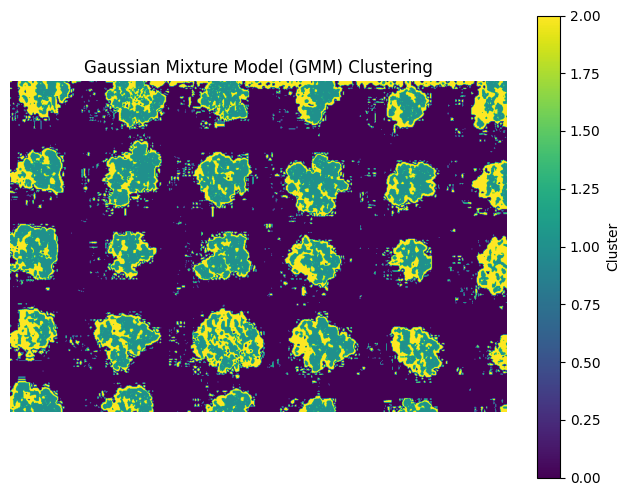

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
def apply_gmm_clustering(data, n_components=3):
    """
    Apply Gaussian Mixture Model (GMM) clustering.

    Parameters:
    - data: Data prepared for clustering (N, features).
    - n_components: Number of Gaussian components (clusters).

    Returns:
    - Cluster labels for each data point.
    """
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

# Example: Use ExG for GMM clustering
data, original_shape = prepare_data_for_clustering(image, use_index="ExG")
gmm_labels = apply_gmm_clustering(data, n_components=3)
visualize_clusters(gmm_labels, original_shape, title="Gaussian Mixture Model (GMM) Clustering")


#### DBSCAN (Density-Based Spatial Clustering)

DO NOT RUN THIS FOR ANY REASON

COMPLETELY EATS YOUR RAM

WELCOME TO SWAP SPACE

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN Clustering
def apply_dbscan_clustering(data, eps=0.05, min_samples=10):
    """
    Apply DBSCAN clustering.

    Parameters:
    - data: Data prepared for clustering (N, features).
    - eps: Maximum distance between two samples for them to be considered as neighbors.
    - min_samples: Minimum number of points in a neighborhood to form a cluster.

    Returns:
    - Cluster labels for each data point.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

# Example: Use ExG for DBSCAN clustering
# data, original_shape = prepare_data_for_clustering(image, use_index="ExG")
# dbscan_labels = apply_dbscan_clustering(data, eps=0.12, min_samples=5)
# visualize_clusters(dbscan_labels, original_shape, title="DBSCAN Clustering")
